<a href="https://colab.research.google.com/github/gpk2544/ML2024/blob/main/ML_1a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

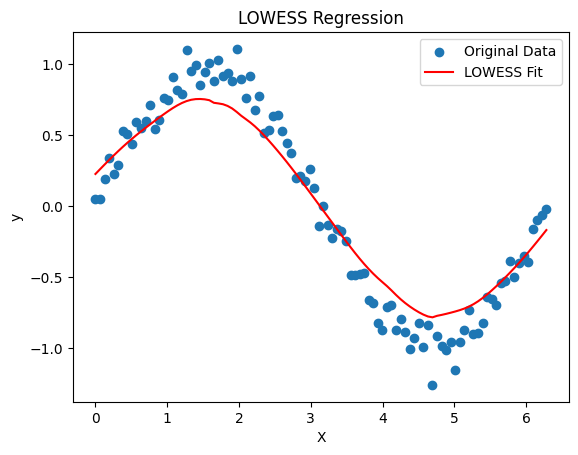

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic dataset
np.random.seed(42)  # Set seed for reproducibility
X = np.linspace(0, 2 * np.pi, 100)
y = np.sin(X) + np.random.normal(0, 0.1, X.shape[0])

def lowess(X, y, alpha=0.3, num_iterations=3):
    # Initialize variables
    n = X.shape[0]
    y_smoothed = np.zeros(n)

    # Iterate over each data point
    for i in range(n):
        weights = np.exp(-0.5 * ((X - X[i]) / alpha) ** 2)

        # Perform local regression
        for _ in range(num_iterations):
            W = np.diag(weights)
            X_augmented = np.column_stack((np.ones(n), X))
            theta = np.linalg.inv(X_augmented.T @ W @ X_augmented) @ X_augmented.T @ W @ y
            y_predicted = X_augmented @ theta

            # Update weights based on residuals
            residuals = y - y_predicted
            robust_weights = np.exp(-0.5 * ((residuals / alpha) ** 2))
            weights = np.clip(robust_weights, a_min=1e-6, a_max=None)

        # Smoothed value is the prediction at the data point
        y_smoothed[i] = y_predicted[i]

    return y_smoothed

# Apply LOWESS to fit the data
y_smoothed = lowess(X, y)

# Plot the original data and the smoothed curve
plt.scatter(X, y, label='Original Data')
plt.plot(X, y_smoothed, color='red', label='LOWESS Fit')
plt.legend()
plt.xlabel('X')
plt.ylabel('y')
plt.title('LOWESS Regression')
plt.show()


In [ ]:
import random

# Generate a random number between 1 and 10
random_number = random.randint(1, 10)
print(f"Random number: {random_number}")


Random number: 4
